___
# PROJETO 1

## <font color='red'>LUCAS CARDOSO FONTENLA</font>
___


## <font color='blue'>COMO OS APOSENTADOS QUE AINDA TRABALHAM ESTÃO EM RELAÇÃO AO GRUPO DOS QUE NÃO TRABALHAM MAIS?</font>

## Introdução

<p>Segundo uma matéria publicada no site do Uol, e na seção do InfoMoney (http://www2.uol.com.br/infopessoal/noticias/_HOME_OUTRAS_1684399.shtml), cada vez mais cresce o número de aposentados que retornam ao trabalho, ou que nunca deixam de trabalhar.</p> 
Segundo a fonte, as principais causas se referem ao baixo valor que o INSS paga aos aposentados e também ao alto custo de vida no país.</p>
<p>Segundo o site do JusBrasil (http://apet.jusbrasil.com.br/noticias/2308850/aposentado-que-trabalha-cai-nas-garras-da-receita-federal), o fato de os aposentados retornarem ao trabalho os faz de "presa fácil" às garras da Receita Federal e que no fundo, o valor recebido com o trabalho não custeia uma melhora na qualidade de vida.</p>
<p>Em contrapartida, sites como da Globo (http://g1.globo.com/jornal-hoje/noticia/2010/08/aposentados-que-ainda-trabalham-podem-pedir-revisao-do-beneficio.html), e da A Tribuna (http://www.atribuna.com.br/noticias/noticias-detalhe/economia/aposentados-que-trabalham-tem-seus-direitos-garantidos/?cHash=7b0483db8c512b457799b78dac422558), noticiam que o Senado Brasileiro vem tomando medidas para que o trabalho do trabalhador aposentado seja realizado com mais conforto.</p>
<p>Assim, por meio desta análise, busco compreender dois grupos de aposentados, que serão divididos em aposentados que ainda trabalham e aposentados que não trabalham mais.</p> 
<p><b>Qual dos grupos apresenta melhor qualidade de vida?</b></p>



___
## Análise e Resultados

### Parte 1- Importando arquivos e bibliotecas e checando dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lucas\Documents\GitHub\Final\CD\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression='zip')
print('Ok - Leitura de PES2014.zip completa')

Ok - Leitura de PES2014.zip completa


In [6]:
pnad2014.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [7]:
pnad2014.columns = estrutura.Coluna

### Parte 2- Início da Análise
#### 2.1- Conhecendo o grupo
<p>Para a análise existem dois grupos de análise, os aposentados que trabalham e aqueles que não trabalham mais.</p>
<ul>
<li>Variável V9122 diz se <b>é ou não</b> aposentado.</li>
<li>Variável V4704 diz se a pessoa <b>é economicante ativa ou não</b></li>
</ul>
<p><b>Quantos são aposentados?</b></p>

Tabela Comparativa do Gráfico Abaixo

 Não Aposentado    273118
Aposentado         38643
Name: V9122, dtype: int64


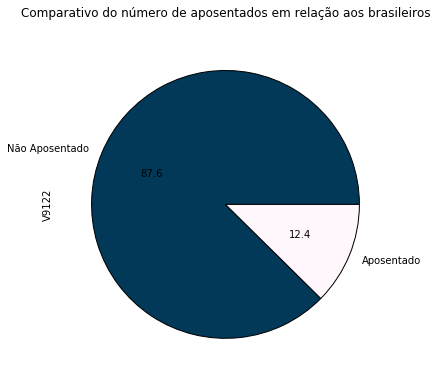

In [8]:
pnad2014.V9122 = pnad2014.V9122.astype('category')
pnad2014.V9122.cat.categories = ('Aposentado', 'Não Aposentado')

rl1 = pnad2014.V9122.value_counts()
print('Tabela Comparativa do Gráfico Abaixo\n\n', rl1)
aposentados_x_brasileiros = rl1.plot(kind='pie', colormap='PuBu_r', autopct='%.1f', figsize=(6,6))
plt.title('Comparativo do número de aposentados em relação aos brasileiros\n')

<p>Dos aposentados quantos são mulheres?</p>
<p>A idade para aposentadoria das mulheres é menor, será que há portanto mais mulheres trabalhando?</p>
<p>Variável V0302: Sexo do indivíduo</p>

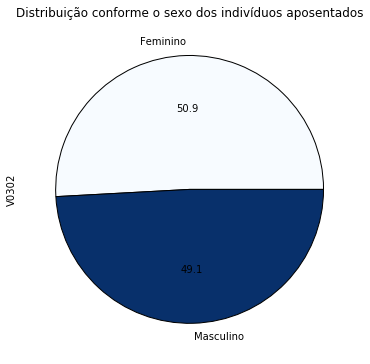

In [79]:
pnad2014.V0302 = pnad2014.V0302.astype('category')
pnad2014.V0302.cat.categories = ('Masculino', 'Feminino')

aposentados = pnad2014[(pnad2014.V9122 == 'Aposentado') & (pnad2014.V4742 != 999999999999)]

vc_aposentados_x_sexo = aposentados.V0302.value_counts()

aposentados_x_sexo = vc_aposentados_x_sexo.plot(kind='pie', autopct='%.1f', figsize=(6,6), colormap='Blues')
plt.title('Distribuição conforme o sexo dos indivíduos aposentados')
plt.show()

Quantos dos aposentados são idosos?
<p>Segundo a legislação brasileira, é possível se aposentar sem uma idade mínima pré-determinada, somente com o número de anos trabalhados. Desse modo, quanto mais idosos, menor a chance de ter mais aposentados trabalhando, por causa das condições físicas dos mesmos.</p>

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\

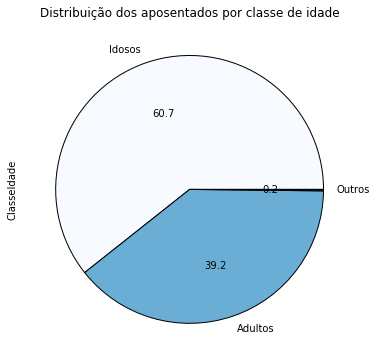

In [78]:
aposentados['ClasseIdade'] = aposentados.V8005

aposentados.ClasseIdade[(aposentados.V8005 <= 24)] = 'Outros'
aposentados.ClasseIdade[(aposentados.V8005 >= 25) & (aposentados.V8005 <= 64)] = 'Adultos'
aposentados.ClasseIdade[(aposentados.V8005 >= 65)] = 'Idosos'

classe_idade = aposentados.ClasseIdade.value_counts()

plot_classe_idade = classe_idade.plot(kind='pie', colormap='Blues', autopct='%.1f', figsize=(6,6))
plt.title('Distribuição dos aposentados por classe de idade')
plt.show()

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


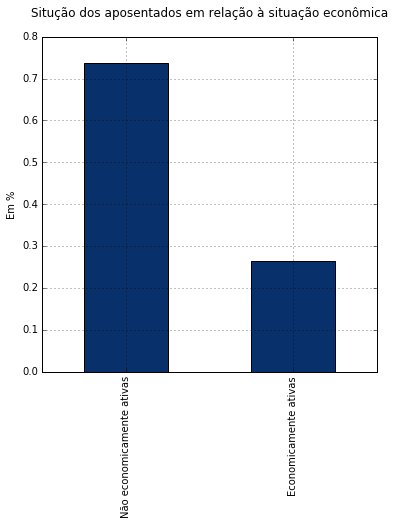

In [77]:
aposentados.V4704 = aposentados.V4704.astype('category')
aposentados.V4704.cat.categories = ('Economicamente ativas', 'Não economicamente ativas')

trabalho_aposentados = aposentados.V4704.value_counts(True)

plot_trab = trabalho_aposentados.plot(kind='bar', colormap='Blues_r', figsize=(6,6))
plt.title('Situção dos aposentados em relação à situação econômica\n')
plt.grid()
plt.ylabel('Em %')
plt.show()

#### Resumo do perfil
<p>Até agora, sabemos que a população de aposentados no Brasil equivale a cerca de 12,4%, e que deles, a população está quase que igualmente dividida entre os sexos, sendo 49,2% do sexo masculino.</p>
<p>Sabemos também que 60,6% dos entrevistados são Idosos, sendo cerca de 39,2% Adultos em idade ativa.</p>
Dos aposentados, cerca de 75% não trabalham mais

#### 2.2- Separação dos Grupos e início da análise

<p>Para analisar qual grupo tem uma melhor qualidade de vida, vamos coniserar as seguintes variáveis</p>
<ol>
<li>V4742 - Rendimento mensal domiciliar <em>per capita</em>: Essa variável quantitativa expressa qual o poder econômico da família do indivíduo, que diretamente infere na qualidade de vida. Mais que apenas a renda do indivíduo, tal variável ajuda a entender a qualidade de vida com a análise de sua família</li>
<li>V4729 - Peso da pessoa: Essa variável quantitativa nos dá um parâmetro sobre a saúde da pessoa. Podendo ser inferida a saúde do grupo.</li>
<li>V06111 - Usou a internet nos útlimos 3 meses (1-sim; 3-não): Essa variável qualitativa indica se a pessoa tem acesso ou não à internet, o que afeta muito na qualidade de vida, pois diz muito sobre a infra-estrutura local do indivíduo. Se a pessoa tem acesso disponível, a localidade tem uma melhor infraestrutura.</li>
<li>V0409 - Indica o porquê o indivíduo mora na residência atual. A atenção será voltada para o motivo referente à saúde, pois podemos analisar qual grupo de aposentados é mais dependente e tem mais indivíduos com a saúde mais debilitada.</li>
</ol>

#### 2.2.1/2 - Rendimento mensal domiciliar e peso da pessoa
O peso baixo de uma pessoa indica pobreza, que consequentemente indica uma menor qualidade de vida. Nos aposentados, qual essa relação?

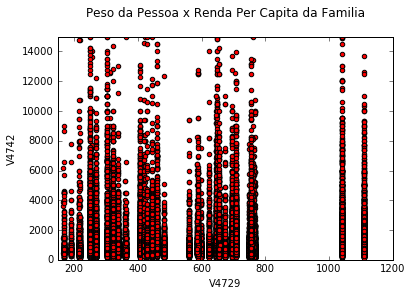

In [76]:
aposentados.plot(kind="scatter", x='V4729', y='V4742', color='r')
plt.axis([150, 1200, 0, 15000])
plt.title('Peso da Pessoa x Renda Per Capita da Familia\n')
plt.show()

Coeficiente a:  1638.32651222
Coeficiente b:  -0.181262991887


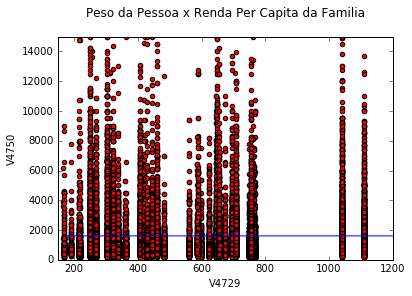

In [13]:
def scatter_and_line(dataframe, column1, column2, size_axis, plot_title):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    b = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    a = dataframe[column2].mean() - b * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (a + b * dataframe[column1].min(), a + b * dataframe[column1].max()), color='blue')
    plt.axis(size_axis)
    plt.title(plot_title)
    
    print("Coeficiente a: ", a)
    print("Coeficiente b: ", b)
    
    
scatter_and_line(aposentados, "V4729","V4750", [150, 1200, 0, 15000], 'Peso da Pessoa x Renda Per Capita da Familia\n')

<p><b>Dados Insteressantes:</b> pelo PNAD, não é possível estabelecer uma relação entre o peso da pessoa e a renda <em>per capita</em> da família. Desse modo, a variável peso não é uma boa escolha para a análise.</p>
<p>As outras variáveis escolhidas são mais óbvias a relação entre elas e o problema descrito, desse modo, prosseguiremos a análise.</p>

In [14]:
trab_aposentados = aposentados[aposentados.V4704 == 'Economicamente ativas']
ntrab_aposentados = aposentados[aposentados.V4704 == 'Não economicamente ativas']

#### 2.2.1 - RENDA PER CAPITA
<p>A análise de renda para ambos os grupos está a seguir. O grupo que tiver maior renda, consequentemente, tem um potencial para uma melhor qualidade de vida. Lembrando que a renda utilizada é a renda per capita no domicílio do indivíduo, pois, esse tipo de renda explicita melhor a qualidade de vida analisando o contexto em que vive.</p>

In [15]:
print('Tabela descritiva dos aposentados que trabalham\n'.upper())
print(trab_aposentados.V4750.describe())

print('\n\nTabela descritiva dos aposentados que não trabalham\n'.upper())
print(ntrab_aposentados.V4750.describe())

TABELA DESCRITIVA DOS APOSENTADOS QUE TRABALHAM

count      9705.000000
mean       1976.103555
std        4372.218987
min          80.000000
25%                NaN
50%                NaN
75%                NaN
max      331200.000000
Name: V4750, dtype: float64


TABELA DESCRITIVA DOS APOSENTADOS QUE NÃO TRABALHAM

count    27160.000000
mean      1372.821981
std       1796.475638
min        103.000000
25%               NaN
50%               NaN
75%               NaN
max      76500.000000
Name: V4750, dtype: float64


C:\Users\lucas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


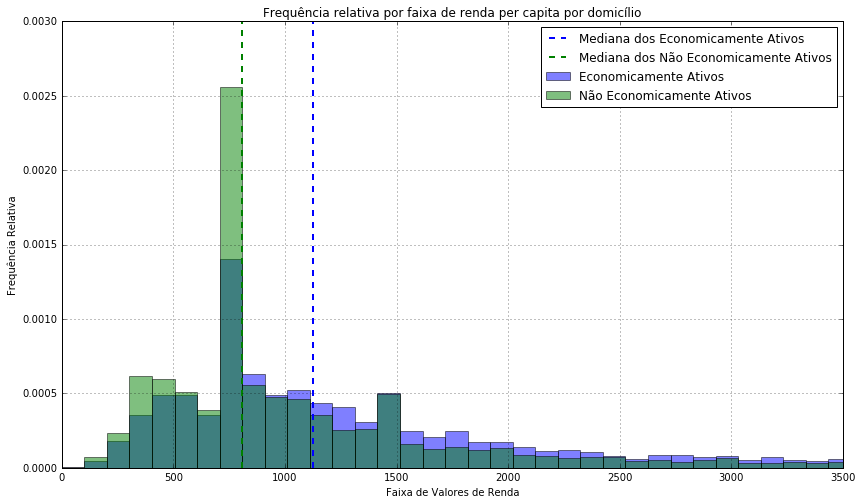

In [16]:
from matplotlib import pyplot
import numpy

bins = numpy.linspace(0, 10000, 100)

pyplot.figure(figsize=(14, 8))
pyplot.hist(trab_aposentados.V4750, bins, alpha=0.5, label='Economicamente Ativos', normed=True)
pyplot.hist(ntrab_aposentados.V4750, bins, alpha=0.5, label='Não Economicamente Ativos', normed=True)
pyplot.axvline(trab_aposentados.V4750.median(), color='b', linestyle='dashed', linewidth=2, label='Mediana dos Economicamente Ativos')
pyplot.axvline(ntrab_aposentados.V4750.median(), color='g', linestyle='dashed', linewidth=2, label='Mediana dos Não Economicamente Ativos')
pyplot.legend(loc='upper right')
plt.title('Frequência relativa por faixa de renda per capita por domicílio')
plt.xlabel('Faixa de Valores de Renda')
plt.ylabel('Frequência Relativa')
pyplot.axis([0, 3500, 0, 0.0030])
pyplot.grid(True)
pyplot.show()

<p>Analisando o histograma acima, torna-se nítido, pela análise das medianas do grupo de aposentados economicamente e não esconomicamente ativos, que a maior parte dos aposentados economicamente ativos tem um maior acúmulo de renda <em>per capita</em> que a maior parte dos aposentados não economicamente ativos</p>
<p>Ou seja, em outras palavras, maior parte da população de aposentados economicamente ativos tem mais acúmulo de renda que os não ativos, desse modo a <b>potencialidade econômica para desenvolver uma melhor qualidade de vida é maior.</b></p>
<p>Ainda, pela tabela descritiva anterior ao histograma, torna-se claro que a média de rendimento per capita domiciliar da parcela dos aposentados ativos é muito superior à média de rendimento per capita domiciliar dos aposentados não ativos.</p>
<p><b>Em resumo, os aposentados economicamente ativos tem uma maior potencialidade de desenvolver uma melhor qualidade de vida.</b> Desse modo, prossigo a análise com a variável qualitativa V06111 que indica se a pessoa acessou a internet nos últimos 3 meses, desse modo é possível inferir sobre a infraestrutura local. Hoje, os aposentados estão mais conectados, pois até mesmo o extrato do INSS pode ser visto online.</p>

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


TABELA CRUZADA ENTRE O ESTADO ECONÔMICO ATUAL E O ACESSO A INTERNET

Estado Econômico atual  Economicamente ativas  Não economicamente ativas  \
Acesso a internet                                                          
Sim                                  0.065566                   0.121348   
Não                                  0.198027                   0.615059   
All                                  0.263593                   0.736407   

Estado Econômico atual       All  
Acesso a internet                 
Sim                     0.186914  
Não                     0.813086  
All                     1.000000  


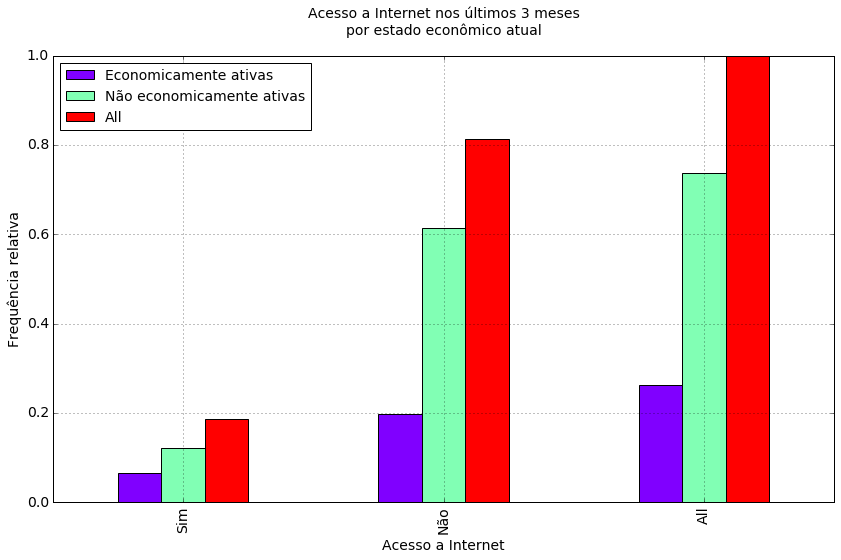

In [37]:
aposentados.V06111 = aposentados.V06111.astype('category')
aposentados.V06111.cat.categories = ('Sim', 'Não')

ct_econ_x_net = pd.crosstab(aposentados.V06111, aposentados.V4704, margins=True, rownames=['Acesso a internet'], colnames=['Estado Econômico atual'], normalize=True)

print('Tabela Cruzada entre o Estado Econômico atual e o acesso a internet\n'.upper())
print(ct_econ_x_net)

ct1 = ct_econ_x_net.plot(kind='bar', colormap='rainbow', figsize=(14, 8), fontsize=14)
plt.title('Acesso a Internet nos últimos 3 meses\npor estado econômico atual\n', fontsize=14)
plt.ylabel('Frequência relativa', fontsize=14)
plt.xlabel('Acesso a Internet', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid()

<p>A análise do gráfico acima indica que aqueles aposentados que ainda são economicamente ativos, tem maior acesso à internet, isso representa que estão cada vez mais conectados e que a infraestrutura local tem suporte para tal tecnologia, e desse modo, podemos inferir que há uma melhor qualidade de vida.</p>
<p>Abaixo análise da variável que indica qual grupo teve um maior auxílio saúde no último mês. Tal variável é capaz de nos dizer qual grupo está com a saúde mais debilitada</p> 

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


TABELA CRUZADA ENTRE O ESTADO ECONÔMICO ATUAL E O MOTIVO PELO QUAL MORA NA RESIDÊNCIA ATUAL

Estado Econômico atual                     Economicamente ativas  \
Motivo pelo qual mora na residência atual                          
Financeiro                                              0.020000   
Saúde                                                   0.026667   
Vontade própria                                         0.133333   
Outros                                                  0.026667   
All                                                     0.206667   

Estado Econômico atual                     Não economicamente ativas       All  
Motivo pelo qual mora na residência atual                                       
Financeiro                                                  0.106667  0.126667  
Saúde                                                       0.280000  0.306667  
Vontade própria                                             0.353333  0.486667  
Outros                   

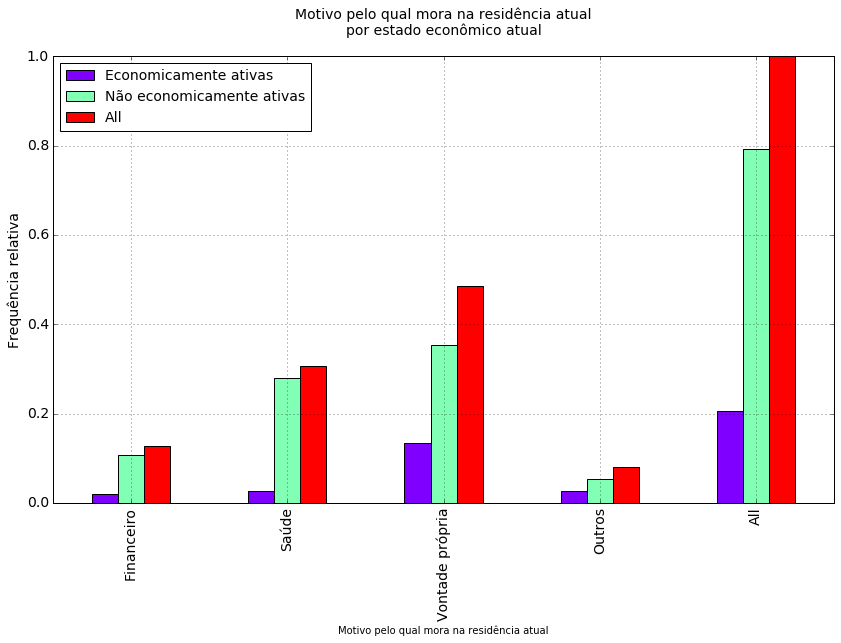

In [47]:
aposentados.V0409 = aposentados.V0409.astype('category')
aposentados.V0409.cat.categories = ('Financeiro', 'Saúde', 'Vontade própria', 'Outros')

ct_motivo = pd.crosstab(aposentados.V0409, aposentados.V4704, margins=True, rownames=['Motivo pelo qual mora na residência atual'], colnames=['Estado Econômico atual'], normalize=True)

print('Tabela Cruzada entre o Estado Econômico atual e o motivo pelo qual mora na residência atual\n'.upper())
print(ct_motivo)

ct1 = ct_motivo.plot(kind='bar', colormap='rainbow', figsize=(14, 8), fontsize=14)
plt.title('Motivo pelo qual mora na residência atual\npor estado econômico atual\n', fontsize=14)
plt.ylabel('Frequência relativa', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid()

Relação entre economicamente ativos ou não e o motivo pelo qual mora na residência atual: dados referentes a tabela cruzada anterior.

In [49]:
pct_saude_trab = (0.0266667/0.20666667)*100
pct_saude_ntrab = (0.28/0.795333)*100

print('\nPorcentagem das pessoas que moram na residência atual por causa de saúde'.upper())
print('Economicamente ativos:', pct_saude_trab)
print('Não economicamente ativos:', pct_saude_ntrab)


PORCENTAGEM DAS PESSOAS QUE MORAM NA RESIDÊNCIA ATUAL POR CAUSA DE SAÚDE
Economicamente ativos: 12.903241727367071
Não economicamente ativos: 35.20537938196957


Pelo gráfico e tabela acima, podemos notar que muito mais pessoas que moram na residência atual por causa de motivos de saúde, são economicamente não ativos. Assim, aqueles que trabalham, segundo os dados, são mais independentes quanto sua própria saúde e/ou apresentam menores problemas de saúde. Independentemente da inferência (se eles são mais independentes, ou apresentam menores problemas de saúde) a importância dos dados revela que aqueles que ainda são economicamente ativos, tem sim uma melhor qualidade de vida.

#### Resumo até o momento
<p>O objetivo da análise é saber se os aposentados que ainda trabalham conseguem uma melhor qualidade de vida do que aqueles que não trabalham mais.</p>
<p><b>Variáveis analisadas até o momento e conclusões</b></p>
<ol>
<li>V9122 - Usada para comparar os grupos entre aposentados ou não no cenário brasileiro.</li>
<li>V4704 - A variável foi usada para comparar e separar os grupos de aposentados economicamente ativos e não ativos.</li>
<li>V0302 - A variável foi usada para comparar os aposentados por sexo dos indivíduos.</li>
<li>V8005 - A variável foi usada para separar os aposentados em classes de idade para melhor compreender o cenário brasileiro.</li>
<li>V4742 - A variável foi usada para comparar os rendimentos dos economicamente ativos e os não ativos.</li>
<li>V4729 - A variável foi usada para analizar qual a relação entre renda e peso do indivíduo.</li>
<li>V06111 - Avariável foi usada para avaliar qual grupo de aposentados tinha maior acesso à internet.</li>
</ol>

Pelas análises até o momento atual, o grupo dos aposentados que são atualmente economicamente ativos, tem uma maior potencialidade de desenvolver uma melhor qualidade de vida.

Resta o questionamento, o grupo dos aposentados não economicamente ativos é mais dependente e tem a saúde mais fragilizada porque? O ócio deles leva à diminuição na qualidade de vida? Além do mais, para entender um pouco mais sobre os economicamente ativos, qual a área que eles mais trabalham e quantas horas trabalham por semana? Para completar todo o projeto, há alguns anos, em PNADs anteriores, quantos aposentados ainda trabalhavam?

Variável quantitativa V4746: Indica qual a situação de ocupação do indivíduo na semana. A análise será feita para o grupo dos aposentados que não trabalham.

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


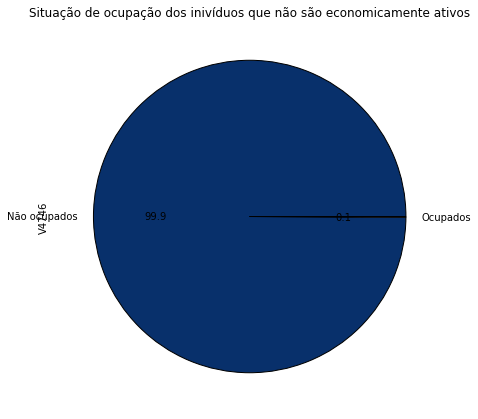

In [75]:
ntrab_aposentados.V4746 = ntrab_aposentados.V4746.astype('category')
ntrab_aposentados.V4746.cat.categories = ('Ocupados', 'Não ocupados')

ocup = ntrab_aposentados.V4746.value_counts(True)

plt.figure(figsize=(7,7))
ocup_plot = ocup.plot(kind='pie', autopct='%.1f', colormap='Blues_r')
plt.title('Situação de ocupação dos inivíduos que não são economicamente ativos')
plt.show()

Nitidamente, quase todos os aposentados que não trabalham, não realizam nenhuma ocupação na sua vida, nada como hobbies por exemplo. De fato tal resultado ilustra o fato de que eles são os mais dependentes e mais frágeis em relação à saúde.

Para avaliar quantas horas os aposentados economicamente ativos trabalham, será usada a nona variável V9058, que indica quantitativamente as horas de trabalho por semana.

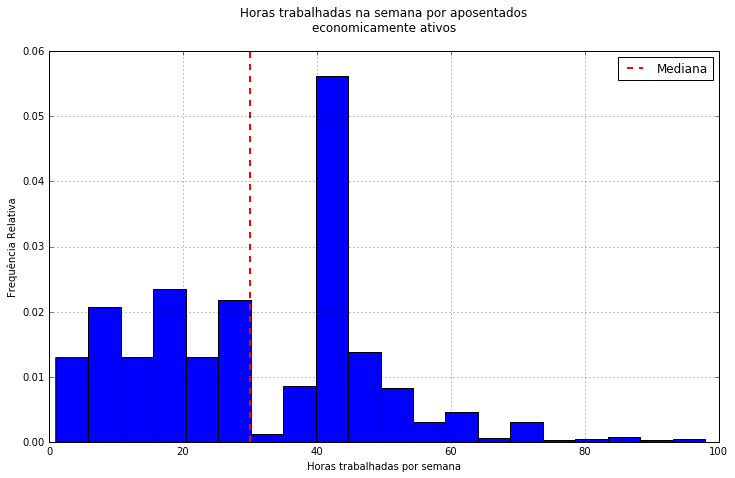

Mediana: 30.0
Média: 31.01
Horas trabalhadas por dia: 6.0


In [87]:
plt.figure(figsize=(12,7))
trab_aposentados.V9058.hist(bins=20, normed=True)
pyplot.axvline(trab_aposentados.V9058.median(), color='r', linestyle='dashed', linewidth=2, label='Mediana')
plt.title('Horas trabalhadas na semana por aposentados\neconomicamente ativos\n')
plt.legend(loc='best')
plt.ylabel('Frequência Relativa')
plt.xlabel('Horas trabalhadas por semana')
plt.show()

print('Mediana:', trab_aposentados.V9058.median())
print('Média:', round(trab_aposentados.V9058.mean(), 2))
print('Horas trabalhadas por dia:', trab_aposentados.V9058.median()/5)

O histograma superior sugere que poucos aposentados realizam horas excessivas de trabalho, sendo sua mediana igual a 30 horas semanais que equivale à 6 horas diarias 5 dias na semana.
Desse modo, nota-se que a jornada de trabalho deles, apesar da idade elevada de muitos, é relativamente curta.

Para entender um pouco mais vou usar a variável V4816 que indica qual o trabalho que os aposentados ativos executam. 

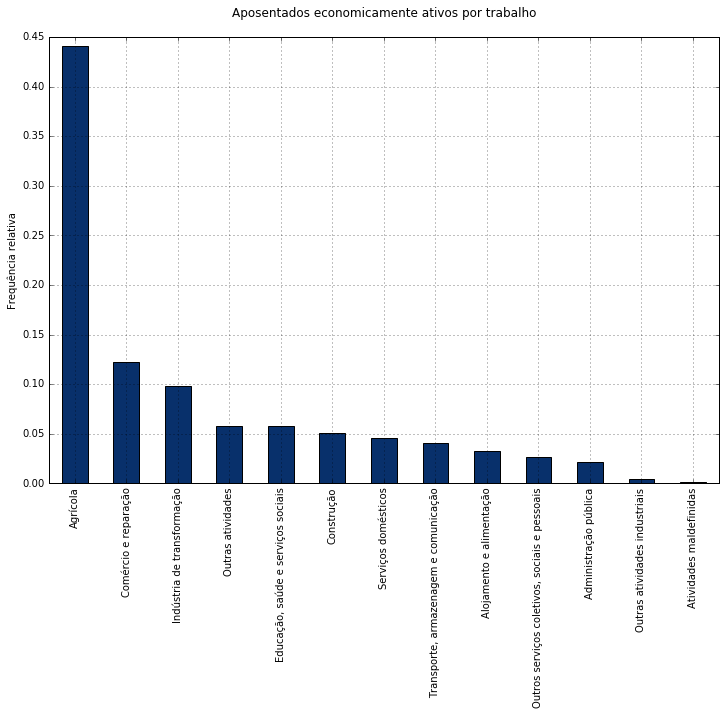

In [102]:
trab_aposentados.V4816 = trab_aposentados.V4816.astype('category')
trab_aposentados.V4816.cat.categories = ('Agrícola', 'Outras atividades industriais', 'Indústria de transformação', 
                                        'Construção',
                                        'Comércio e reparação',
                                        'Alojamento e alimentação',
                                        'Transporte, armazenagem e comunicação',
                                        'Administração pública',
                                        'Educação, saúde e serviços sociais',
                                        'Serviços domésticos',
                                        'Outros serviços coletivos, sociais e pessoais',
                                        'Outras atividades',
                                        'Atividades maldefinidas')

plt.figure(figsize=(12,8))
trabalho_re = trab_aposentados.V4816.value_counts(True)
trabalho_re.plot(kind='bar', colormap='Blues_r')
plt.title('Aposentados economicamente ativos por trabalho\n')
plt.ylabel('Frequência relativa')
plt.grid()
plt.show()


## Conclusão 

O projeto busca analisar <b>qual grupo de aposentados tem uma melhor qualidade de vida, aqueles que trabalham ou aqueles que são somente aposentados</b>
<p>O perfil dos aposentados no Brasil é o seguinte:</p>
<ul>
<li>12,4% dos dos brasileiros são aposentados</li>
<li>Desses 12,4%, 49,1% são do sexo masculino</li>
<li>69% dos aposentados são idosos, e 39,2% adultos</li>
<li>75% dos aposentados não são economicamente ativos</li>
</ul>
<p>O aposentado brasileiro é bem distribuido entre os sexos, porém há um número alto de aposentados idosos, o que diminui o número de indivíduos ainda economicamente ativos, que pode ser visto no dado de que 75% deles são justamente não economicamente ativos.</p>
<p>Desse modo, os grupos foram separados pela situação econômica atual</p>
<p>Segundo as análises, a faixa de renda é muito maior para os aposentados que ainda trabalham, isso implica diretamente <b>na potencialidade de desenvolver uma melhor qualidade de vida.</b></p>
<p>Em comparação, também, viu-se que os aposentados economicamente ativos<b> acessam muito mais a internet</b> do que os aposentados não economicamente ativos. Tal fato diz muito sobre a infraestrutura local e a acessibilidade à comunição, o que diretamente interfere na potencialidade de desenvolver uma maior qualidade de vida</p>
<p>Além do mais, viu-se que aqueles que não são economicamente ativos, tem maior dependência e fragilidade em relação à saúde.<p>
<p>Um pouco além da pergunta da análise, foi identificado que 99,9% dos aposentados que não trabalham, não exercem nenhum tipo de <em>hobbie</em>, e são desocupadas o tempo todo. O ócio é intimamente ligada à qualidade de vida psicológica do indivíduo, assim, há mais uma explicação pelo fato dos não economicamente ativos desenvolverem uma menor qualidade de vida.</p>
<p>Prosseguindo um pouco, como forma de provar a ideia, foi analisada a carga horária semanal dos indivíduos aposentados economicamente ativos e viu-se que ela não é nem um pouco abusiva, e tem seus valores diários baixos como 6 horas por dia. Sobre o tipo de trabalho, boa parte do trabalho realizado por aposentados é agrícola, e o trabalho no campo sem horas nem um pouco abusivas, contribuem para uma melhoria na qualidade de vida.</p>
<p><b>Em suma, com a análise dos dados, é possível definir que os aposentados que ainda trabalham conseguem uma melhor qualidade de vida, e, se entrarmos no âmbito da política, seria de grande importância abrir os olhos para esses profissionais que ainda continuam no mercado e garantir-lhes seus direitos.</b></p>